In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
file_path = 'C:/Users/7kingdom/Documents/인공지능개론/src/car+evaluation/car.data'

column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]          

df = pd.read_csv(file_path, header=None, names=column_names)

df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label=LabelEncoder()

df['buying']=label.fit_transform(df['buying'])
df['maint']=label.fit_transform(df['maint'])
df['doors']=label.fit_transform(df['doors'])
df['persons']=label.fit_transform(df['persons'])
df['lug_boot']=label.fit_transform(df['lug_boot'])
df['safety']=label.fit_transform(df['safety'])
df['class']=label.fit_transform(df['class'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

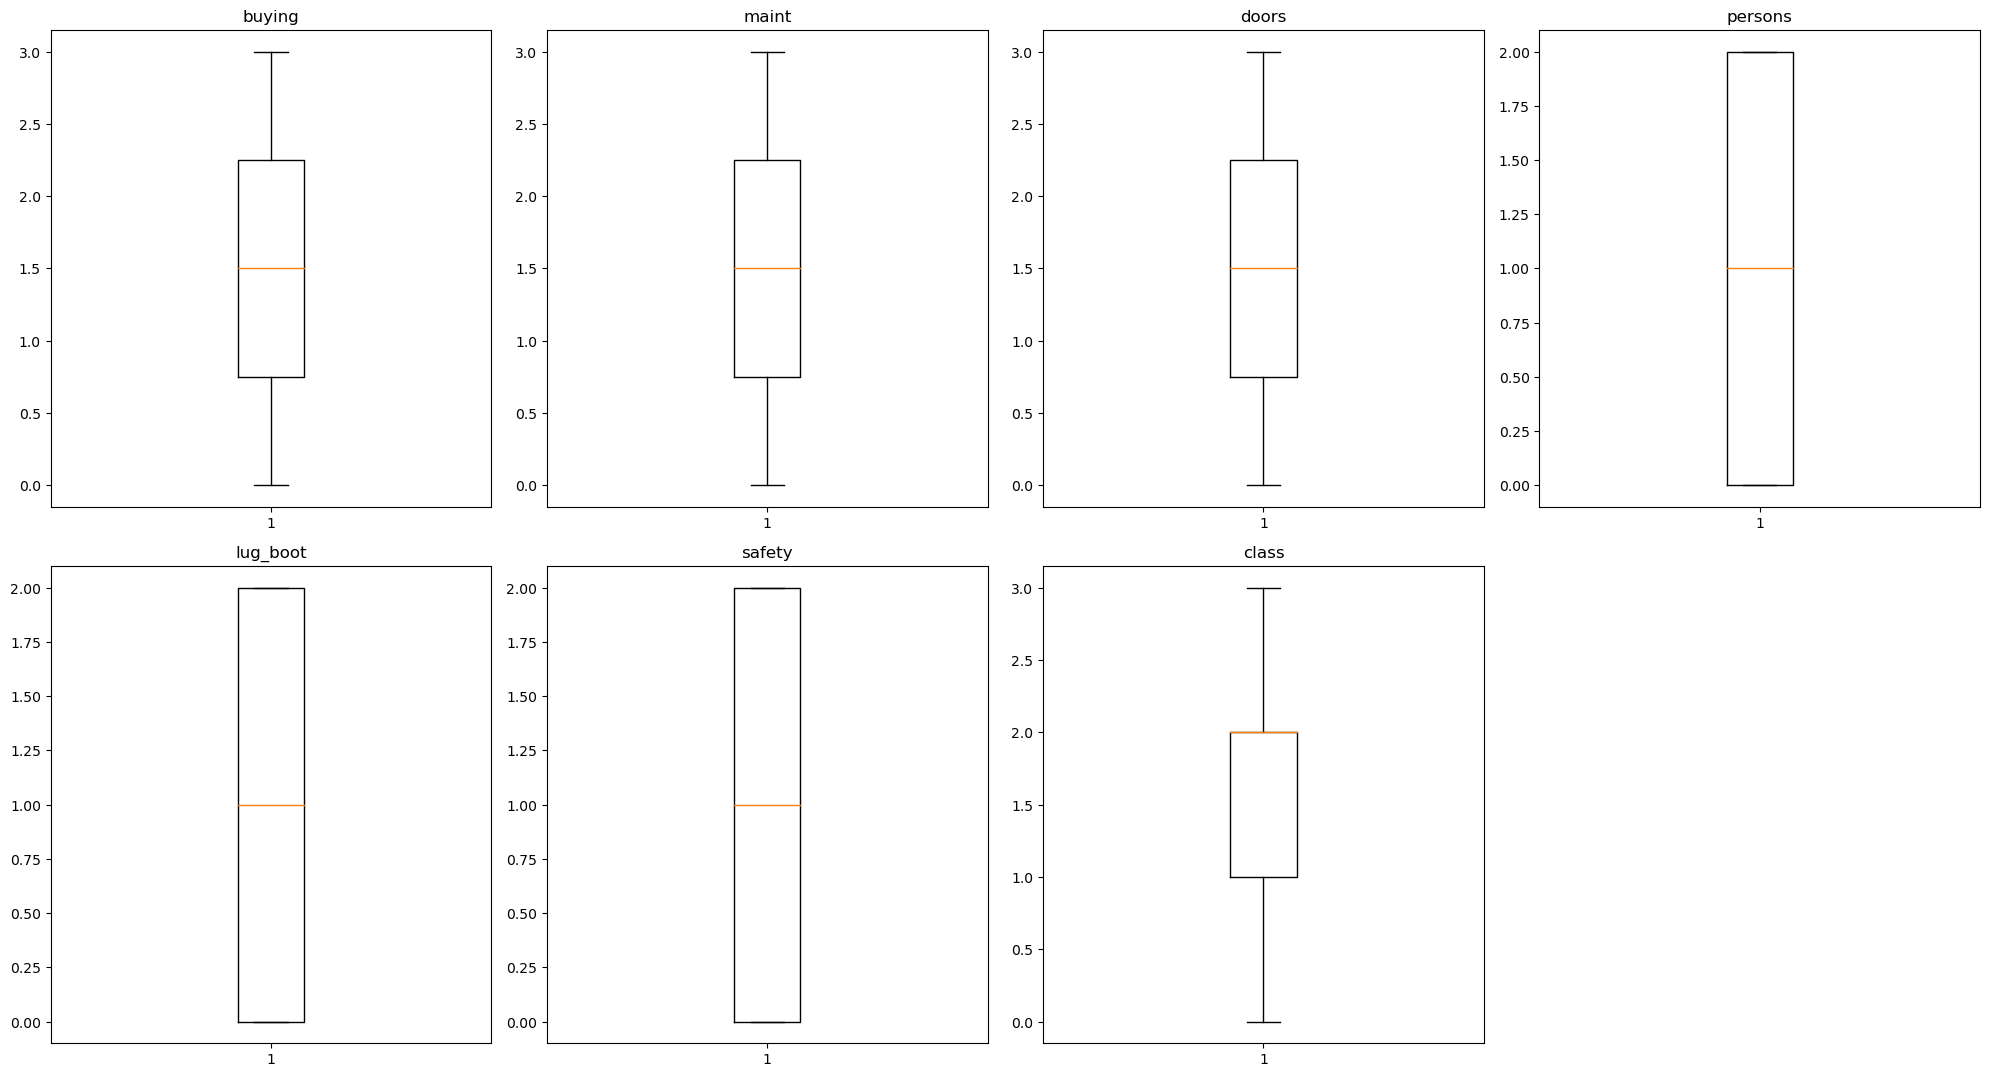

In [6]:
# 박스 플롯 그리기
plt.figure(figsize=(20, 16))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

Text(0.5, 1.0, 'Label')

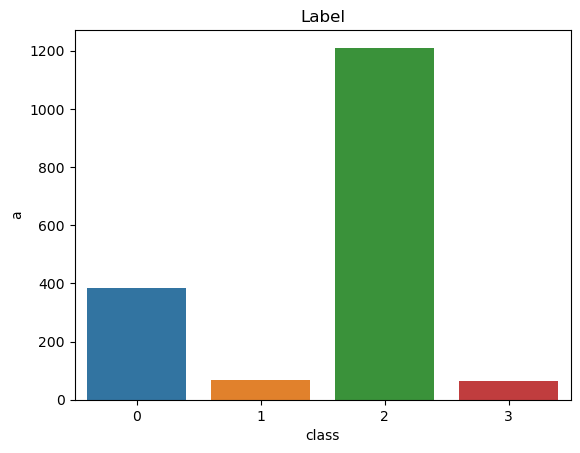

In [8]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.ylabel("a")
plt.title("Label")

In [9]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

2    1210
0     384
1      69
3      65
Name: class, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 정규화(Min-Max Scaling)
scaler = MinMaxScaler()
scaled_data_minmax = scaler.fit_transform(df.drop('class', axis=1))  # Outcome 열 제외하고 정규화
scaled_df_minmax = pd.DataFrame(scaled_data_minmax, columns=df.columns[:-1])  # 데이터프레임으로 변환

scaled_df_minmax

,buying,maint,doors,persons,lug_boot,safety
0,1.000000,1.000000,0.0,0.0,1.0,0.5
1,1.000000,1.000000,0.0,0.0,1.0,1.0
2,1.000000,1.000000,0.0,0.0,1.0,0.0
3,1.000000,1.000000,0.0,0.0,0.5,0.5
4,1.000000,1.000000,0.0,0.0,0.5,1.0
...,...,...,...,...,...,...
1723,0.333333,0.333333,1.0,1.0,0.5,1.0
1724,0.333333,0.333333,1.0,1.0,0.5,0.0
1725,0.333333,0.333333,1.0,1.0,0.0,0.5
1726,0.333333,0.333333,1.0,1.0,0.0,1.0


In [11]:
X=scaled_df_minmax
X.head(5)

,buying,maint,doors,persons,lug_boot,safety
0,1.0,1.0,0.0,0.0,1.0,0.5
1,1.0,1.0,0.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.5,0.5
4,1.0,1.0,0.0,0.0,0.5,1.0


In [12]:
y=df['class']
y.head(5)

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int32

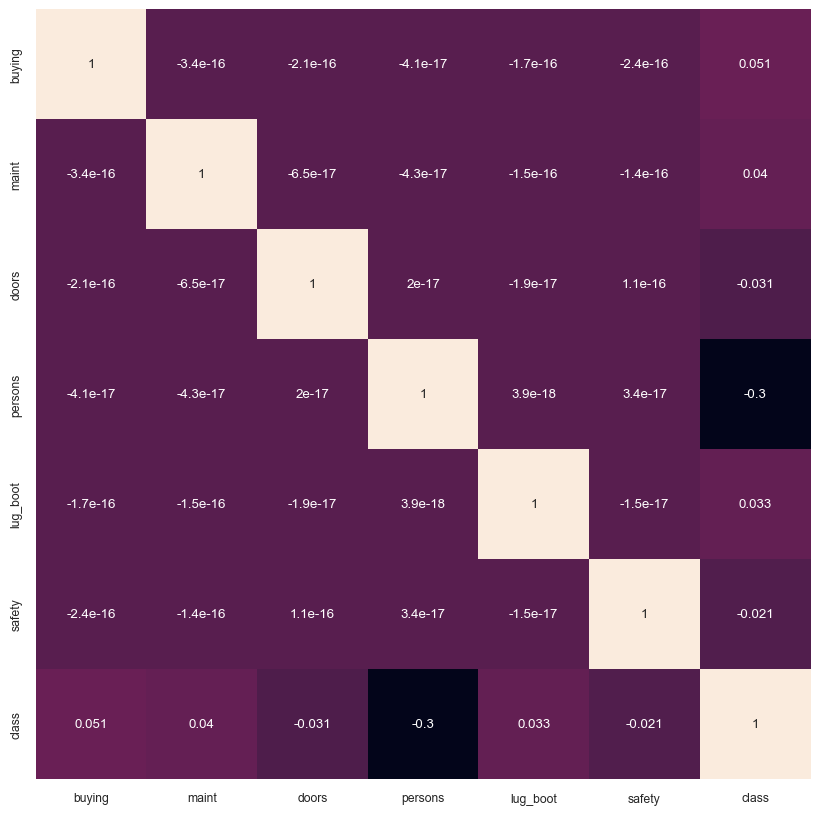

In [13]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1296, 6) (432, 6) (1296,) (432,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print(classification_report(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))


--- Decision Tree Classifier ---
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        99
           1       0.84      1.00      0.91        21
           2       0.99      0.99      0.99       296
           3       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.95      0.97      0.96       432
weighted avg       0.98      0.98      0.98       432

[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]


In [17]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print(classification_report(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))


--- Logistic Regression Classifier ---
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        99
           1       0.84      1.00      0.91        21
           2       0.99      0.99      0.99       296
           3       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.95      0.97      0.96       432
weighted avg       0.98      0.98      0.98       432

[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]


In [18]:
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(classification_report(y_test,pred_dt))

print(confusion_matrix(y_test,pred_dt))


--- Radom Forest ---
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        99
           1       0.84      1.00      0.91        21
           2       0.99      0.99      0.99       296
           3       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.95      0.97      0.96       432
weighted avg       0.98      0.98      0.98       432

[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]


In [19]:
from sklearn.neighbors import KNeighborsClassifier
print("\n--- K-Nearest Neighbors (KNN) Classifier ---")

# 대충 k값 5
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)

pred_knn = clf_knn.predict(X_test)
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_dt))


--- K-Nearest Neighbors (KNN) Classifier ---
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        99
           1       0.60      0.29      0.39        21
           2       0.99      0.86      0.92       296
           3       0.86      0.75      0.80        16

    accuracy                           0.84       432
   macro avg       0.76      0.70      0.71       432
weighted avg       0.88      0.84      0.85       432

[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]
